In [1]:
import os
import shutil
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Session1 Ses01F_impro01.txt moved.
Writing Emotion Data to csv for Session1
Session1 moved & wrote.
folder structure all set up!
plotting ...


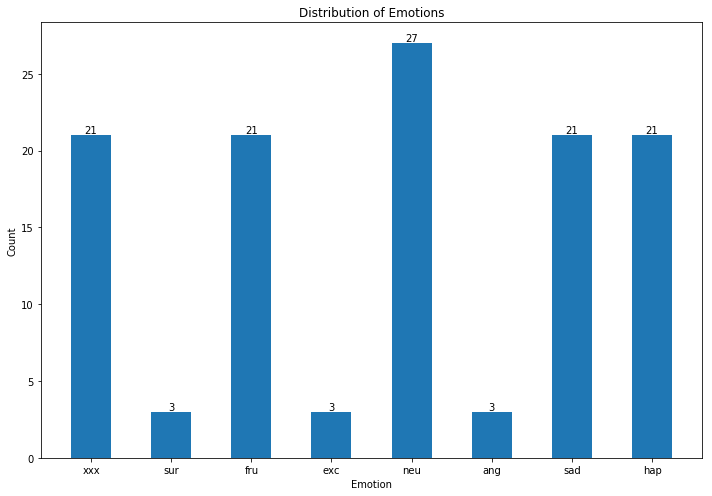

emotion category distribution plot saved!


In [10]:
def get_wav_path(filename, session, cwd):
    """get wav file path based on a filename (emo_data['name'].values[n])
    
    Args:
    filenames(str): a wav filename from pandas dataframe.
    cwd(str): current working directory.
    
    Return: 
    wav_path(str): wav file path with respect to filename.
    """
    
    setting = filename[0:-5]
    wav_path = str(cwd) + "/data/iemocap/IEMOCAP_full_release/" + session + \
        "/sentences/wav/" + setting 
    
    return wav_path


def setup_folder_structure(emotions, cwd):
    if not os.path.exists("./figures"):
        os.makedirs("./figures")
    else: pass
    if not os.path.exists(cwd + "/data/iemocap/emotions"):
        os.makedirs(cwd + "/data/iemocap/emotions")
    else: pass
    
    emo_root = cwd + "/data/iemocap/emotions"
    for emotion in emotions:
        if not os.path.exists(emo_root + "/" + emotion):
            os.makedirs(emo_root + "/" + emotion)
        else: pass
    
    return emo_root

def get_dict(emo_data):
    emo_dict = dict(zip(emo_data["name"].values, emo_data["emotion"].values))
    
    return emo_dict

def move_wav(wav_path, emo_root, filename, emotion):
    src = wav_path + "/" + filename + ".wav"
    dst = emo_root + "/" + emotion
    shutil.copy(src, dst)
    return 

def plot_emo_num(emo_num, server="local"):
    """plot distribution of emotion categoriy.
    
    Args:
    emo_num(list): list of unique emotion
    server(str): local - plot emotion distribution; ssh - without plotting. 
    
    Return:
    save (or plot) emotion categoriy plot.
    """
    
    fig, ax = plt.subplots(figsize=(10,7))

    index = np.arange(len(emo_num))
    bar_width = 0.5

    rects = ax.bar(index, list(emo_num.values()), bar_width)

    ax.set_xlabel('Emotion')
    ax.set_ylabel('Count')
    ax.set_title('Distribution of Emotions')
    ax.set_xticks(index)
    ax.set_xticklabels(list(emo_num.keys()))
    ax.legend()
    labels = list(emo_num.values())

    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height, label,
                ha='center', va='bottom')
    fig.tight_layout()
    fig.savefig("./figures/emotion_distribution.png")
    if server =="local":
        plt.show()
    elif server =="ssh":
        pass
    else: 
        raise ValueError("server not defined.")
    

def main():
    # loop through folders
    cwd = os.getcwd()
    sessions = [session for session in os.listdir(cwd + "/data/iemocap/IEMOCAP_full_release/") 
                     if session.startswith('Session')]
    #print(sessions)
    for session in sessions:
        path_txt = cwd + "/data/iemocap/IEMOCAP_full_release/" + session + "/dialog/EmoEvaluation"
        path_wav = cwd + "/data/iemocap/IEMOCAP_full_release/" + session + "/sentences/wav"
        filenames_txt = [txt for txt in os.listdir(path_txt) if txt.startswith('Ses') and txt.endswith('.txt')]
        filenames_wav = [wav for wav in os.listdir(path_wav) if wav.startswith('Ses') and wav.endswith('.wav')]
        aux_data = pd.DataFrame(columns=["time", "name", "emotion","vad"])

        for name in filenames_txt:
            aux = pd.read_csv(os.path.join(path_txt, name),delimiter="\t",header=0, 
                             names=["time", "name", "emotion","vad"])
            aux_data = pd.concat([aux_data,aux])

            # get filenames with emotion auxilary data
            emo_data = aux_data[aux_data['name'].str.match('Ses')]
            emotions = np.unique(emo_data['emotion'])
            emo_root = setup_folder_structure(emotions, cwd)
            emo_dict = get_dict(emo_data)
            for wav in emo_dict.keys(): 
                emotion = emo_dict[wav]
                wav_path = get_wav_path(wav, session, cwd)
                move_wav(wav_path, emo_root, wav, emotion)
        print(session, name,"moved.\nWriting Emotion Data to csv for", session)
        emotion_data = emo_data[["name","emotion"]]
        emotion_data.to_csv("./Conceptor/Emotion/emotion_data.csv") 

        print(session, "moved & wrote.")

    
if __name__ == "__main__":
    main()
    print("folder structure all set up!")

    print("plotting ...")
    emo_dir = "./data/iemocap/emotions"
    emotions = [emotion for emotion in os.listdir(emo_dir) if not emotion.startswith('.')]
    emo_num = {}
    for emotion in emotions:
        emo_num[emotion] = len(os.listdir(emo_dir + "/" + emotion))
    plot_emo_num(emo_num, server="local")
    print("emotion category distribution plot saved!")

        
        

        